<a href="https://colab.research.google.com/github/Denilza/Cientista-de-Dados/blob/main/Exercicio_Estat%C3%ADstica_Probabilidade_e_Amostragem_Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np




In [ ]:

import pandas as pd

url = 'https://drive.google.com/uc?export=download&id=1VQVAw7MQM5aDs0sH4JNcMXghDNoEQnQU'
df = pd.read_csv(url)
print(df.head())



   Unnamed: 0 estado  idade escolaridade nível de proficiência em inglês  \
0           0     MA     56  Fundamental                   Intermediário   
1           1     BA     46     Superior                          Básico   
2           2     AM     32  Fundamental                   Intermediário   
3           3     CE     60     Superior                          Básico   
4           4     SE     25  Fundamental                        Avançado   

     renda sexo  
0  4006.29    F  
1  2423.11    M  
2  3835.69    M  
3  1870.29    M  
4  3529.80    M  


In [ ]:
df.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.

In [ ]:
# Contar o total de pessoas no dataset
total_pessoas = len(df)

# Contar quantas pessoas têm o nível 'avançado' de inglês (considerando fluente)
pessoas_fluentes = df[df['nível de proficiência em inglês'] == 'Avançado'].shape[0]

#pessoas_fluentes = len(df[df['nível de proficiência em inglês'] == 'avançado'])

In [ ]:
# Calcular a probabilidade de ser fluente
prob_fluentes = pessoas_fluentes / total_pessoas

# Calcular a probabilidade complementar (não ser fluente)
prob_nao_fluente = (1 - prob_fluentes)

# Exibir o resultado
print(f'Probabilidade de não ser fluente em inglês: {prob_nao_fluente:.2%}')

Probabilidade de não ser fluente em inglês: 65.60%


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
pessoas_alagoas_ou_para = (df[(df['estado'] == 'AL') | (df['estado'] == 'PA')])
total_pessoas = len(pessoas_alagoas_ou_para)

pessoas_renda_5k = len(pessoas_alagoas_ou_para[pessoas_alagoas_ou_para['renda'] > 5000])

probabilidade_renda_5k = pessoas_renda_5k / total_pessoas

print(f'Probabilidade de renda superior a 5k: {probabilidade_renda_5k:.2%}')

Probabilidade de renda superior a 5k: 5.06%


3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
pessoas_amazonas = df[df['estado']== 'AM']

In [ ]:
p_superior = pessoas_amazonas[(pessoas_amazonas['escolaridade'] == 'Superior')| (pessoas_amazonas['escolaridade'] == 'Pós-graduação')]

In [ ]:
total_am = pessoas_amazonas.shape[0]

In [ ]:
prop_am = len(p_superior)/total_am
prop_am

0.5526315789473685

In [ ]:
prob_geom_5_pessoa = stats.geom.pmf(k=5, p=prop_am)
print(f'Probabilidade da quinta pessoa ter ensino superior: {prob_geom_5_pessoa:.2%}')

Probabilidade da quinta pessoa ter ensino superior: 2.21%


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [ ]:
intervalo = 1500
faixas_renda = np.arange(0, df['renda'].max() + intervalo, intervalo)
contagem_por_faixa, _ = np.histogram(df['renda'], bins=faixas_renda)

faixa_predominante = np.argmax(contagem_por_faixa) * intervalo
print("Faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)

Faixa de renda predominante: 3000 - 4500


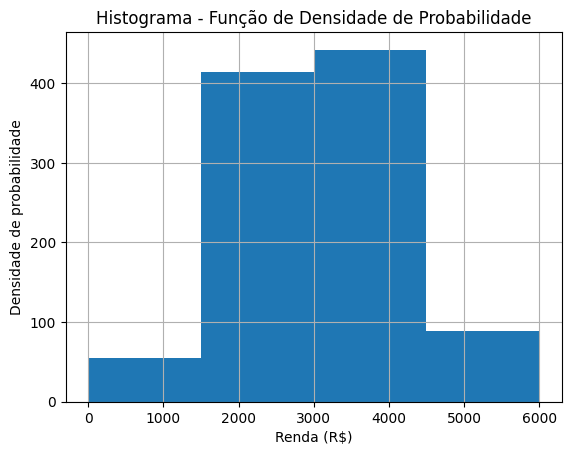

In [ ]:
plt.hist(df['renda'], bins=faixas_renda)
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [ ]:
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f"Média da renda: {media_renda}")
print("Variância da renda:", variancia_renda)

Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


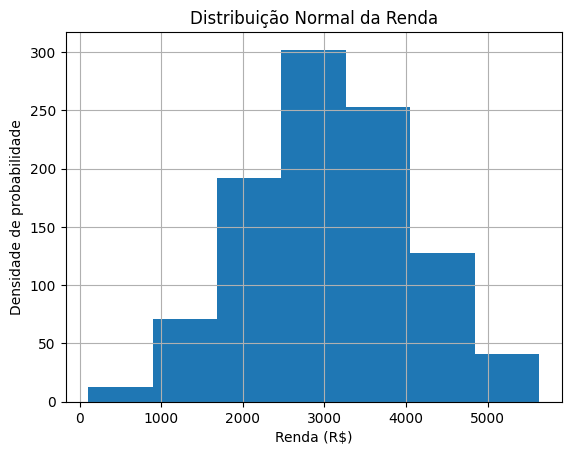

In [ ]:
plt.hist(df['renda'], bins=7)
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
p_pos_graduacao = len(df[df['escolaridade'] == 'Pós-graduação']) / len(df)
p_pos_graduacao

0.253

In [ ]:
n = 1000000
k= 243000

In [ ]:
prob_pos_grad = stats.binom.pmf(k, n, p_pos_graduacao)
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_grad}')

Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: 1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
# Contando a frequência de cada nível de escolaridade
escolaridade_counts = df['escolaridade'].value_counts()

In [ ]:
# Calculando a densidade relativa
densidade_relativa = escolaridade_counts / escolaridade_counts.sum()

In [ ]:
# Calculando a densidade acumulada
densidade_acumulada = densidade_relativa.cumsum()

In [ ]:
densidade_acumulada

,count
escolaridade,
Fundamental,0.266
Pós-graduação,0.519
Superior,0.762
Médio,1.000


8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?

In [ ]:
import math
n = len(df)  # Tamanho da amostra
p_intermediario = len(df[df['nível de proficiência em inglês'] == 'Intermediário']) / n  # Proporção de intermediário

In [ ]:
# Nível de confiança de 95%
Z = 1.96

In [ ]:
ME = Z * math.sqrt((p_intermediario * (1 - p_intermediario)) / n)

ME

0.029121603225097343

9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
from scipy.stats import norm
renda = df['renda']

In [ ]:
# 1. Calcular a renda média e o desvio padrão
media_renda = renda.mean()
desvio_padrao_renda = renda.std()

In [ ]:
# 2. Renda mil reais acima da média
renda_acima_1000 = media_renda + 1000

In [ ]:
# 3. Calcular a probabilidade de uma pessoa ter renda >= renda_acima_1000
prob_individual = 1 - norm.cdf(renda_acima_1000, loc=media_renda, scale=desvio_padrao_renda)

In [ ]:
# 4. Usar a distribuição binomial para calcular a probabilidade de 60 pessoas terem essa renda
n_pessoas = 60
probabilidade_60_pessoas = norm.sf(n_pessoas * prob_individual, loc=n_pessoas * prob_individual, scale=np.sqrt(n_pessoas * prob_individual * (1 - prob_individual)))

probabilidade_60_pessoas

0.5

10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
estados_sudeste = ['SP', 'RJ', 'MG', 'ES']

In [ ]:
filtro_sudeste_homem_fundamental_renda = df[
    (df['estado'].isin(estados_sudeste)) &
    (df['sexo'] == 'M') &
    (df['escolaridade'] == 'Fundamental') &
    (df['renda'] > 2000)
]

In [ ]:
# Tamanho da amostra que atende aos critérios
n_selecionados = len(filtro_sudeste_homem_fundamental_renda)

In [ ]:
# Tamanho total da amostra
n_total = len(df)

In [ ]:
# Calculando a probabilidade
probabilidade = n_selecionados / n_total
probabilidade

0.019